In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from data_preprocessing import IsriDataset
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

GA_SOLUTIONS_PATH = "IsriDataset.pkl"

isri_dataset = pickle.load(open(GA_SOLUTIONS_PATH, 'rb'))

df = pd.DataFrame()
for i in range(len(isri_dataset.data['Jobdata'])):
    df_temp = pd.DataFrame.from_dict(isri_dataset.data['Jobdata'][i], orient='index')
    df = pd.concat([df, df_temp])

df[['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10','time11','time12']] = pd.DataFrame(df.times.tolist(), index= df.index)
#print(df)
# 'time11',

df_cluster = df[['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10','time12']] #due_date
#df_cluster.to_excel('output.xlsx', index=False)
#pd.plotting.scatter_matrix(df_cluster, alpha=0.2, figsize=(15,15))
#plt.show()




[[ 2.14353413e+02  2.05680000e+02  1.57247844e+02 -1.77635684e-13
   3.76665439e+01  1.98424745e+02  1.50203922e+02  1.09753911e+02
   1.57252719e+02  2.15220000e+02  4.27988906e+02]
 [ 2.39969991e+02  2.14200000e+02  1.54655207e+02  1.00080000e+02
   1.42376713e+02  2.63241703e+02  2.15415522e+02  2.23767776e+02
   1.38752313e+02  2.23131748e+02  5.20209789e+02]
 [ 2.48100000e+02  4.51080000e+02  1.65480000e+02 -3.55271368e-15
   4.58400000e+01  2.64296571e+02  2.19600000e+02  3.16052816e+02
   1.61686041e+02  2.17200000e+02  5.23500000e+02]
 [ 2.37696065e+02  2.05965802e+02  1.64986510e+02  3.35717135e+00
   1.03334742e+02  2.78590553e+02  2.19403572e+02  3.15638785e+02
   1.56091714e+02  2.17399257e+02  5.11809574e+02]
 [ 2.19049409e+02  2.05680000e+02  1.57756778e+02 -1.06581410e-14
   9.44849831e+01  2.66033993e+02  2.15738389e+02  1.47012759e+02
   1.56298713e+02  2.17200000e+02  4.59165141e+02]
 [ 2.27640000e+02  4.51080000e+02  1.57200000e+02  5.68434189e-14
   3.75600000e+01  

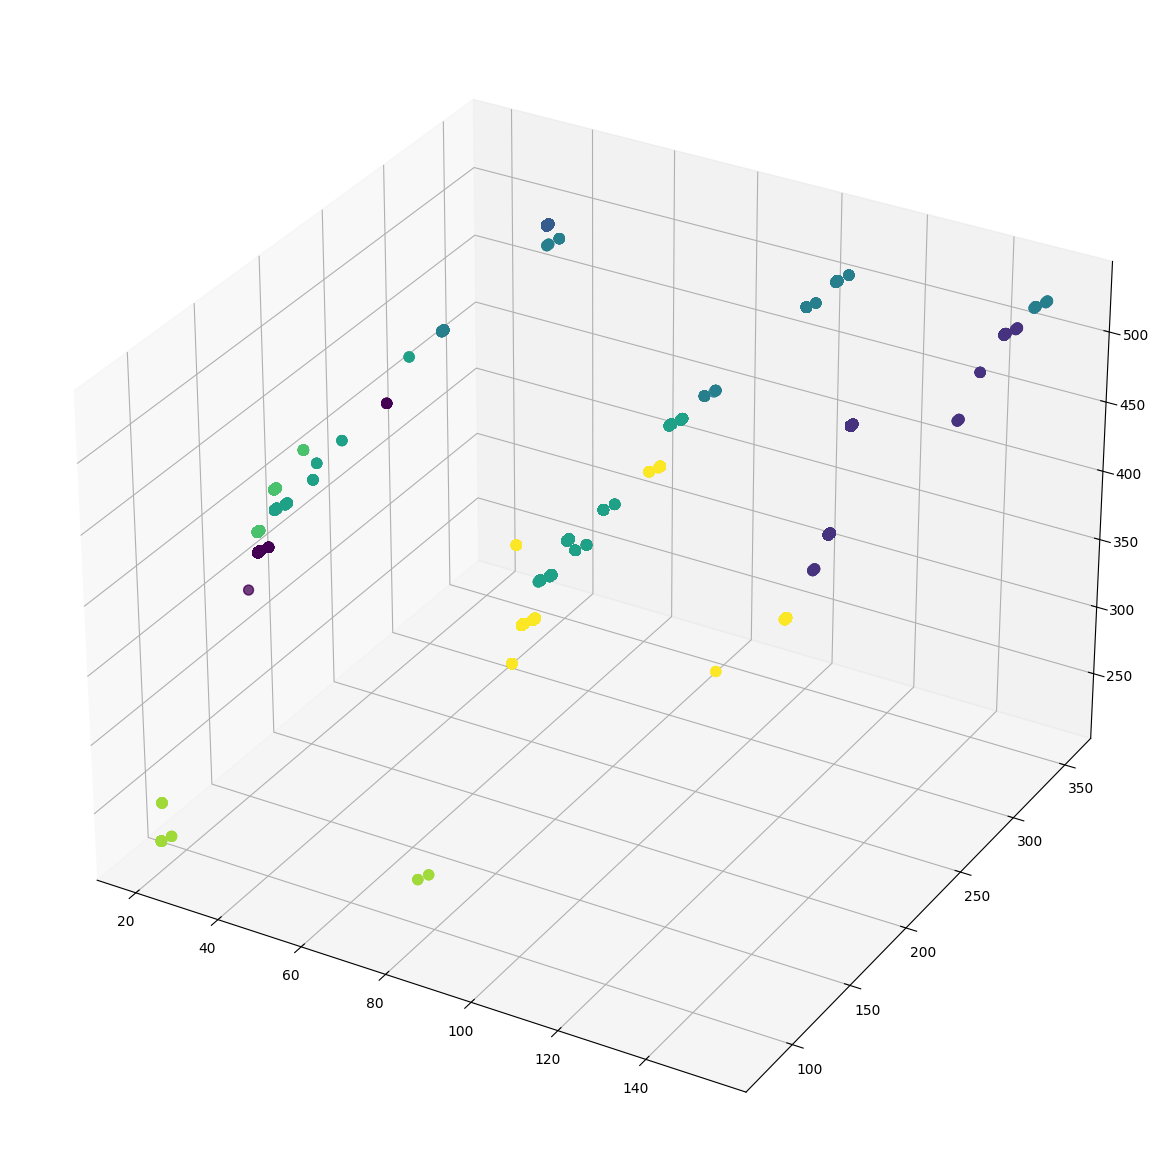

In [4]:
kmeans = KMeans(n_clusters=8).fit(df_cluster)
centroids = kmeans.cluster_centers_
print(centroids)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster['time5'], df_cluster['time8'], df_cluster['time12'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#pd.plotting.scatter_matrix(df_cluster, alpha=0.2, c=kmeans.labels_.astype(float), figsize=(15,15))
#plt.show()
# Matplotlib toolkits
# PCA
# Agglomeratives Clustern

In [5]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10,7))
plt.title('Dendrograms')
#plt.axhline(y=3, color='r', linestyle='--')
dend = sch.dendrogram(sch.linkage(df_, method='ward'))

KeyboardInterrupt: 

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show() 

In [ ]:
def getStocks(stocks, history, attribute):
    return pd.DataFrame({stock:yf.Ticker(stock).history(period=history)[attribute] for stock in stocks})

# multi_plot requires two variables:
# - df is a dataframe with stocks as columns and rows as date of the stock price
# - addAll is to have a dropdown button to display all stocks at once
def multi_plot(df, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Scatter(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ])
    
    fig.show()

In [ ]:
stocks = ['MSFT', # Microsoft
          'AAPL', # Apple
          'AMZN', # Amazon
          'GOOGL' # Google Alphabet
         ]

df_stocks = getStocks(stocks, 'max', 'High')

multi_plot(df_stocks)